In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d
from PIL import Image, ImageFilter

In [5]:
def get_gauss_kernel(size = 3, sigma = 1):
    center = (int)(size / 2)
    kernel = np.zeros((size, size))
    
    for i in range(size):
       for j in range(size):
          diff = np.sqrt((i-center)**2+(j-center)**2)
          kernel[i,j] = np.exp(-(diff**2)/(2*sigma**2))
    return kernel / np.sum(kernel)


def get_sharpness_kernel():
    _kernel = np.array([[-1,-1,-1],
                        [-1,9,-1],
                        [-1,-1,-1]])
    
    return _kernel

def get_emboss_kernel():
    _kernel = np.array([[-2,-1,0],
                        [-1,1,1],
                        [0,1,2]])
    
    return _kernel

def get_unit_kernel(size):
    _kernel = np.zeros((size, size))
    center = (int)(size/2)
    _kernel[center][center] = 1
    
    return _kernel

def conv(img, krn):
    
    is0, is1, ks0, ks1 = *img.shape, *krn.shape
    rs0, rs1 = is0 - ks0 + 1, is1 - ks1 + 1
    res = np.zeros((rs0, rs1), dtype = krn.dtype)
    
    for i in range(rs0):
        for j in range(rs1):
            res[i, j] = (krn * img[i : i + ks0, j : j + ks1]).sum()
            
    return res

def get_array(image):
    output_image = image.convert("RGB")
    width = image.width
    height = image.height
    r_arr = np.zeros((width, height))
    g_arr = np.zeros((width, height))
    b_arr = np.zeros((width, height))
    
    for x in range(width):
        for y in range(height):
            r, g, b = output_image.getpixel( (x, y) )
            r_arr[x][y] = r
            g_arr[x][y] = g
            b_arr[x][y] = b
            
    return r_arr, g_arr, b_arr

def create_img(r_arr, g_arr, b_arr):
    sizeX = len(r_arr)
    sizeY = len(r_arr[0])
    
    new_img = Image.new('RGB', (sizeX, sizeY))
    for x in range(sizeX):
        for y in range(sizeY):
            r = int(r_arr[x][y])
            g = int(g_arr[x][y])
            b = int(b_arr[x][y])
            new_img.putpixel( (x, y), (r, g, b) )
            
    return new_img     

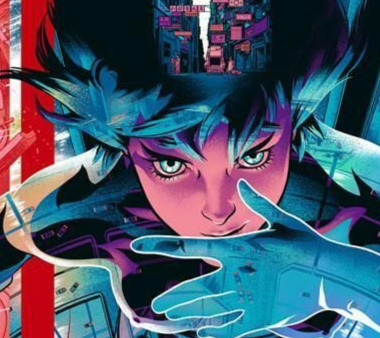

In [6]:
img_before = Image.open(r"source.jpg")
img_before

processing...


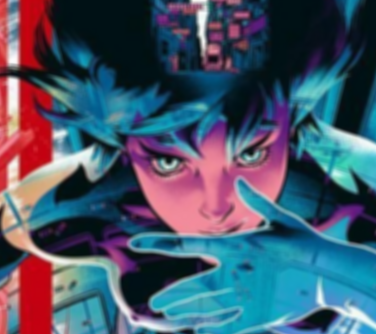

In [7]:
print('processing...')

img_before = Image.open(r"source.jpg")
gaus = get_gauss_kernel(5, 3)

r_arr, g_arr, b_arr = get_array(img_before)
r_c = conv(r_arr, gaus)
g_c = conv(g_arr, gaus)
b_c = conv(b_arr, gaus)


img_gaus = create_img(r_c, g_c, b_c)
img_gaus.save('gaus.jpg')
img_gaus

processing...


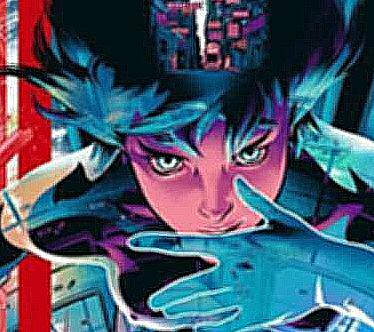

In [8]:
print('processing...')

img_gaus = Image.open(r"gaus.jpg")
sharpness = get_sharpness_kernel()

r_arr, g_arr, b_arr = get_array(img_gaus)
r_c = conv(r_arr, sharpness)
g_c = conv(g_arr, sharpness)
b_c = conv(b_arr, sharpness)


img_sharpness = create_img(r_c, g_c, b_c)
img_sharpness.save('sharpness.jpg')
img_sharpness

processing...


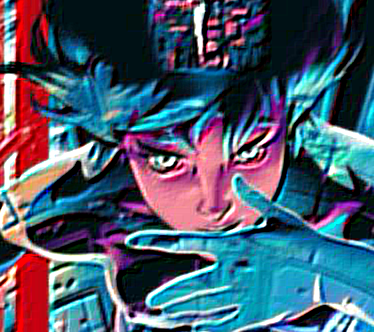

In [9]:
print('processing...')

img_gaus = Image.open(r"gaus.jpg")
sharpness = get_emboss_kernel()

r_arr, g_arr, b_arr = get_array(img_gaus)
r_c = conv2d(r_arr, sharpness)
g_c = conv2d(g_arr, sharpness)
b_c = conv2d(b_arr, sharpness)


img_sharpness = create_img(r_c, g_c, b_c)
img_sharpness.save('emboss.jpg')
img_sharpness

processing...


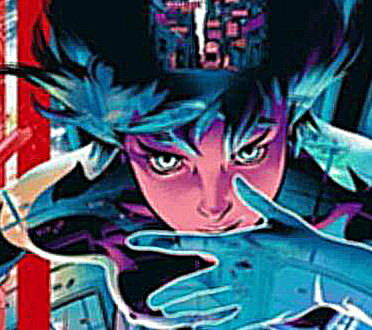

In [10]:
print('processing...')
#e+α(e−H)
gaus = get_gauss_kernel(5, 3)
unit = get_unit_kernel(5)
kernel = unit+5*(unit - gaus)


img_gaus = Image.open(r"gaus.jpg")

r_arr, g_arr, b_arr = get_array(img_gaus)
r_c = conv2d(r_arr, kernel)
g_c = conv2d(g_arr, kernel)
b_c = conv2d(b_arr, kernel)


img_sharpness = create_img(r_c, g_c, b_c)
img_sharpness.save('matrix.jpg')
img_sharpness